## Importing packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lb
import xgboost as xgb
import optuna

pd.set_option("display.max_columns", 100)

## loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\podde\OneDrive\Desktop\ML_Internship\Fraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


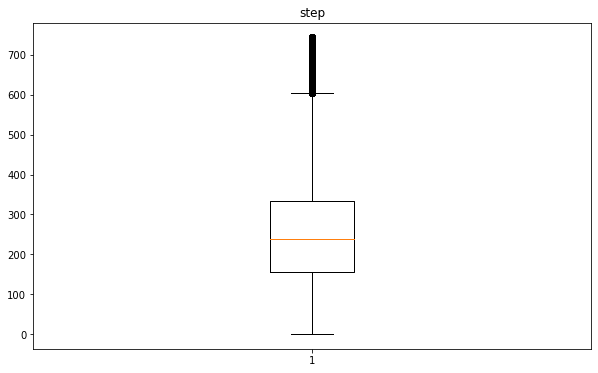

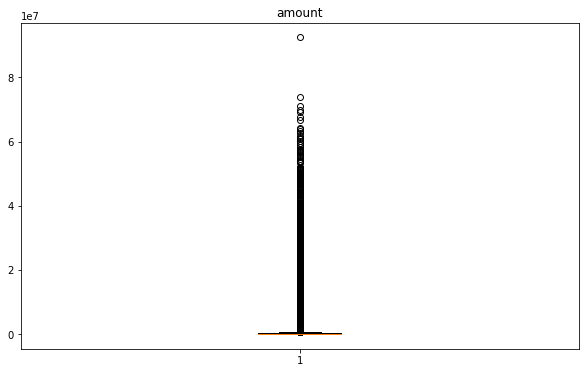

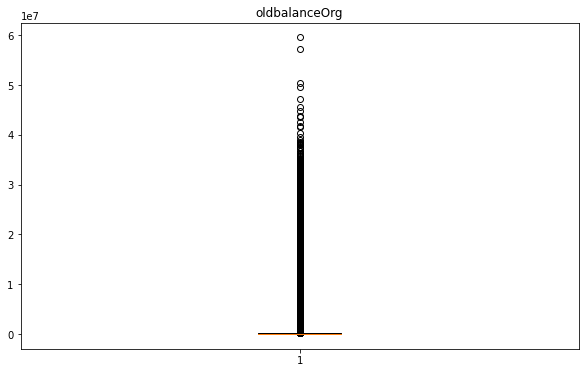

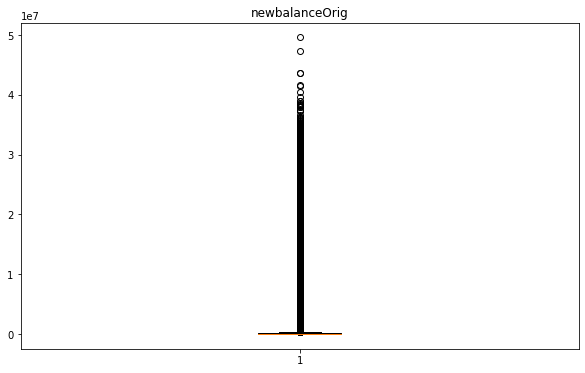

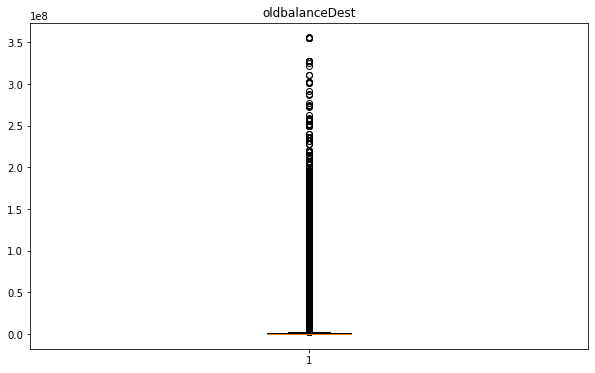

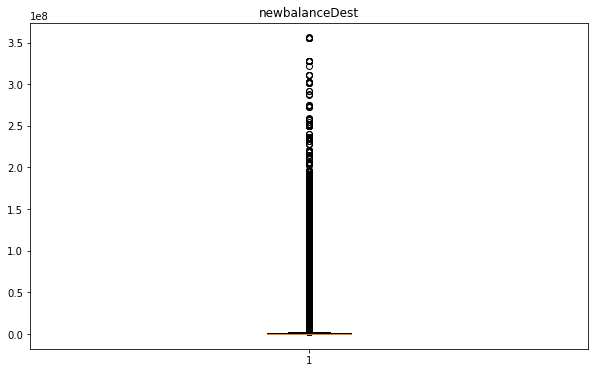

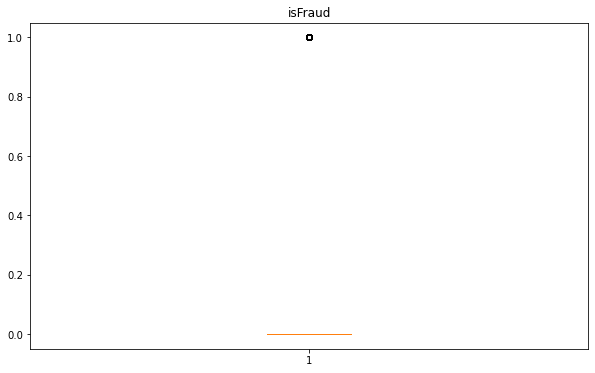

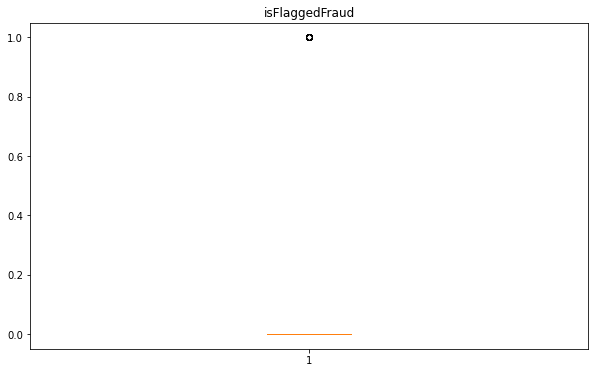

In [4]:
for col in df.select_dtypes(exclude='O'):
    plt.figure(figsize=(10, 6))
    plt.title(col)
    plt.boxplot(df[col])
    plt.show()

## Data preprocessing

In [5]:
df.describe(include='O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### checking for null values

In [34]:
df.isnull().sum() # as we can see no null values

step                    0
amount                  0
oldbalanceOrg           0
newbalanceOrig          0
oldbalanceDest          0
newbalanceDest          0
isFraud                 0
isFlaggedFraud          0
oldbaldiff              0
newbaldiff              0
balOrgdiff              0
balDestdiff             0
type_CASH_IN            0
type_DEBIT              0
type_PAYMENT            0
type_TRANSFER           0
nameDest_C1286084959    0
nameDest_C2083562754    0
nameDest_C248609774     0
nameDest_C665576141     0
nameDest_C985934102     0
nameDestNew_C           0
dtype: int64

## outlier detection

In [38]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [39]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [42]:
dfisFraud = df.loc[df.isFraud == 1]
dfisFraud.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff,type_CASH_IN,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C1286084959,nameDest_C2083562754,nameDest_C248609774,nameDest_C665576141,nameDest_C985934102,nameDestNew_C
2,1,181.0,181.0,0.0,0.0,0.0,1,0,181.0,0.0,-181.0,0.0,0,0,0,1,0,0,0,0,0,1
3,1,181.0,181.0,0.0,21182.0,0.0,1,0,-21001.0,0.0,-181.0,-21182.0,0,0,0,0,0,0,0,0,0,1
251,1,2806.0,2806.0,0.0,0.0,0.0,1,0,2806.0,0.0,-2806.0,0.0,0,0,0,1,0,0,0,0,0,1
252,1,2806.0,2806.0,0.0,26202.0,0.0,1,0,-23396.0,0.0,-2806.0,-26202.0,0,0,0,0,0,0,0,0,0,1
680,1,20128.0,20128.0,0.0,0.0,0.0,1,0,20128.0,0.0,-20128.0,0.0,0,0,0,1,0,0,0,0,0,1


In [43]:
dataflagfraud= df.loc[df.isFlaggedFraud == 1]
dataflagfraud.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff,type_CASH_IN,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C1286084959,nameDest_C2083562754,nameDest_C248609774,nameDest_C665576141,nameDest_C985934102,nameDestNew_C
2736446,212,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1,4953893.08,4953893.08,0.0,0.0,0,0,0,1,0,0,0,0,0,1
3247297,250,1343002.08,1343002.08,1343002.08,0.0,0.0,1,1,1343002.08,1343002.08,0.0,0.0,0,0,0,1,0,0,0,0,0,1
3760288,279,536624.41,536624.41,536624.41,0.0,0.0,1,1,536624.41,536624.41,0.0,0.0,0,0,0,1,0,0,0,0,0,1
5563713,387,4892193.09,4892193.09,4892193.09,0.0,0.0,1,1,4892193.09,4892193.09,0.0,0.0,0,0,0,1,0,0,0,0,0,1
5996407,425,10000000.00,19585040.37,19585040.37,0.0,0.0,1,1,19585040.37,19585040.37,0.0,0.0,0,0,0,1,0,0,0,0,0,1
5996409,425,9585040.37,19585040.37,19585040.37,0.0,0.0,1,1,19585040.37,19585040.37,0.0,0.0,0,0,0,1,0,0,0,0,0,1
6168499,554,3576297.10,3576297.10,3576297.10,0.0,0.0,1,1,3576297.10,3576297.10,0.0,0.0,0,0,0,1,0,0,0,0,0,1
6205439,586,353874.22,353874.22,353874.22,0.0,0.0,1,1,353874.22,353874.22,0.0,0.0,0,0,0,1,0,0,0,0,0,1
6266413,617,2542664.27,2542664.27,2542664.27,0.0,0.0,1,1,2542664.27,2542664.27,0.0,0.0,0,0,0,1,0,0,0,0,0,1
6281482,646,10000000.00,10399045.08,10399045.08,0.0,0.0,1,1,10399045.08,10399045.08,0.0,0.0,0,0,0,1,0,0,0,0,0,1


In [44]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff,type_CASH_IN,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C1286084959,nameDest_C2083562754,nameDest_C248609774,nameDest_C665576141,nameDest_C985934102,nameDestNew_C
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,170136.0,160296.36,-9839.64,0.0,0,0,1,0,0,0,0,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,21249.0,19384.72,-1864.28,0.0,0,0,1,0,0,0,0,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,181.0,0.00,-181.00,0.0,0,0,0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,-21001.0,0.00,-181.00,-21182.0,0,0,0,0,0,0,0,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,41554.0,29885.86,-11668.14,0.0,0,0,1,0,0,0,0,0,0,0


### There are too much of outliers so we cannot impute them.. we have to take outliers as a our original data

In [7]:
df['nameDestNew'] = df['nameDest'].apply(lambda x: x[0])

In [8]:
df.describe(include='O')

,type,nameOrig,nameDest,nameDestNew
count,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2
top,CASH_OUT,C1902386530,C1286084959,C
freq,2237500,3,113,4211125


In [9]:
df['oldbaldiff'] = df['oldbalanceOrg']-df['oldbalanceDest']
df['newbaldiff'] = df['newbalanceOrig']-df['newbalanceDest']
df['balOrgdiff'] = df['newbalanceOrig']-df['oldbalanceOrg']
df['balDestdiff'] = df['newbalanceDest']-df['oldbalanceDest']

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDestNew,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,M,170136.0,160296.36,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,M,21249.0,19384.72,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,181.0,0.00,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,-21001.0,0.00,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,M,41554.0,29885.86,-11668.14,0.0


In [11]:
need = df['nameDest'].value_counts().index[:5]
df['nameDest'] = np.where(df['nameDest'].isin(need), df['nameDest'], 'OTHERS')
df['nameDest'].value_counts()

OTHERS         6362090
C1286084959        113
C985934102         109
C665576141         105
C2083562754        102
C248609774         101
Name: nameDest, dtype: int64

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDestNew,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,OTHERS,0.0,0.0,0,0,M,170136.0,160296.36,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,OTHERS,0.0,0.0,0,0,M,21249.0,19384.72,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,OTHERS,0.0,0.0,1,0,C,181.0,0.00,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,OTHERS,21182.0,0.0,1,0,C,-21001.0,0.00,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,OTHERS,0.0,0.0,0,0,M,41554.0,29885.86,-11668.14,0.0


In [13]:
df = df.drop(['nameOrig'], axis=1)

In [14]:
df = pd.get_dummies(df)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C1286084959,nameDest_C2083562754,nameDest_C248609774,nameDest_C665576141,nameDest_C985934102,nameDest_OTHERS,nameDestNew_C,nameDestNew_M
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,170136.0,160296.36,-9839.64,0.0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,21249.0,19384.72,-1864.28,0.0,0,0,0,1,0,0,0,0,0,0,1,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,181.0,0.00,-181.00,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,-21001.0,0.00,-181.00,-21182.0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,41554.0,29885.86,-11668.14,0.0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   step                  int64  
 1   amount                float64
 2   oldbalanceOrg         float64
 3   newbalanceOrig        float64
 4   oldbalanceDest        float64
 5   newbalanceDest        float64
 6   isFraud               int64  
 7   isFlaggedFraud        int64  
 8   oldbaldiff            float64
 9   newbaldiff            float64
 10  balOrgdiff            float64
 11  balDestdiff           float64
 12  type_CASH_IN          uint8  
 13  type_CASH_OUT         uint8  
 14  type_DEBIT            uint8  
 15  type_PAYMENT          uint8  
 16  type_TRANSFER         uint8  
 17  nameDest_C1286084959  uint8  
 18  nameDest_C2083562754  uint8  
 19  nameDest_C248609774   uint8  
 20  nameDest_C665576141   uint8  
 21  nameDest_C985934102   uint8  
 22  nameDest_OTHERS       uint8  
 23  nameDes

In [16]:
df = df.drop(['type_CASH_OUT', 'nameDestNew_M', 'nameDest_OTHERS'], axis=1)

In [17]:
df.corr() # checking correlation

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff,type_CASH_IN,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C1286084959,nameDest_C2083562754,nameDest_C248609774,nameDest_C665576141,nameDest_C985934102,nameDestNew_C
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,-0.028544,-0.027230,-0.007255,0.001325,0.004077,0.002869,0.004926,0.006925,-0.005766,-0.005432,-0.005767,-0.005700,-0.006074,-0.004926
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.233706,-0.371939,-0.102337,0.845964,-0.009621,-0.023379,-0.197444,0.365896,0.003527,0.002258,0.001471,0.004476,0.001435,0.197444
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,0.617557,0.601470,0.220297,-0.087032,0.506761,-0.021450,-0.189486,-0.081593,0.001014,0.001149,0.001391,0.000950,0.001512,0.189486
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,0.615518,0.602384,0.267750,-0.094456,0.527373,-0.021872,-0.193915,-0.087355,0.001042,0.001181,0.001430,0.000996,0.001588,0.193915
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,-0.743890,-0.737071,0.047460,0.232316,0.076105,0.009347,-0.231455,0.130476,0.014783,0.014171,0.015460,0.017421,0.005708,0.231455
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,-0.741638,-0.772306,0.006451,0.436191,0.034988,0.006346,-0.238315,0.191701,0.014986,0.014398,0.015493,0.018093,0.005573,0.238315
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.011440,-0.005608,-0.362472,0.027028,-0.019089,-0.002911,-0.025697,0.053869,-0.000152,-0.000144,-0.000143,-0.000146,-0.000149,0.025697
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.002973,0.002823,-0.000230,-0.000242,-0.000842,-0.000128,-0.001133,0.005245,-0.000007,-0.000006,-0.000006,-0.000006,-0.000007,0.001133
oldbaldiff,-0.028544,-0.233706,0.617557,0.615518,-0.743890,-0.741638,0.011440,0.002973,1.000000,0.983850,0.110138,-0.241416,0.279424,-0.021734,0.055534,-0.157497,-0.010974,-0.010400,-0.011255,-0.013096,-0.003486,-0.055534
newbaldiff,-0.027230,-0.371939,0.601470,0.602384,-0.737071,-0.772306,-0.005608,0.002823,0.983850,1.000000,0.165084,-0.408532,0.307356,-0.018976,0.067099,-0.208692,-0.011310,-0.010752,-0.011468,-0.013821,-0.003442,-0.067099


In [18]:
plt.figure(figsize=(25, 25), dpi=600)   # using heatmap 
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

## Model building

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['isFraud'], axis=1), df['isFraud'], test_size=0.1, random_state=42, stratify=df['isFraud'])

In [20]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [21]:
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff,type_CASH_IN,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C1286084959,nameDest_C2083562754,nameDest_C248609774,nameDest_C665576141,nameDest_C985934102,nameDestNew_C
3262007,251,293855.37,8692.00,0.00,0.00,293855.37,0,8692.00,-293855.37,-8692.00,293855.37,0,0,0,0,0,0,0,0,0,1
4979213,352,356557.42,9121873.45,9478430.87,1465673.38,1109115.96,0,7656200.07,8369314.91,356557.42,-356557.42,1,0,0,0,0,0,0,0,0,1
6165339,550,6226.76,3293.00,0.00,0.00,0.00,0,3293.00,0.00,-3293.00,0.00,0,0,1,0,0,0,0,0,0,0
3055630,234,183512.69,10429.00,0.00,57493.30,241005.99,0,-47064.30,-241005.99,-10429.00,183512.69,0,0,0,0,0,0,0,0,0,1
2351773,189,18448.63,210066.00,191617.37,0.00,0.00,0,210066.00,191617.37,-18448.63,0.00,0,0,1,0,0,0,0,0,0,0


In [22]:
X_val.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,oldbaldiff,newbaldiff,balOrgdiff,balDestdiff,type_CASH_IN,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C1286084959,nameDest_C2083562754,nameDest_C248609774,nameDest_C665576141,nameDest_C985934102,nameDestNew_C
5570109,393,293204.21,99506.00,0.00,176445.23,469649.44,0,-76939.23,-469649.44,-99506.00,293204.21,0,0,0,0,0,0,0,0,0,1
4723811,332,441285.24,0.00,0.00,2190027.44,2631312.68,0,-2190027.44,-2631312.68,0.00,441285.24,0,0,0,0,0,0,0,0,0,1
3496432,259,202578.14,10584746.15,10787324.30,1319676.88,1117098.74,0,9265069.27,9670225.56,202578.15,-202578.14,1,0,0,0,0,0,0,0,0,1
3680237,276,278952.97,3644731.18,3923684.15,789954.74,511001.77,0,2854776.44,3412682.38,278952.97,-278952.97,1,0,0,0,0,0,0,0,0,1
569135,23,9507.92,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,0


In [23]:
rf = ensemble.RandomForestClassifier(random_state=42, verbose=2, n_jobs=-1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 2 of 100
building tree 1 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100
building tree 7 of 100

building tree 8 of 100building tree 9 of 100
building tree 10 of 100building tree 11 of 100building tree 12 of 100

building tree 13 of 100


building tree 14 of 100
building tree 15 of 100building tree 16 of 100

building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.8s


building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

In [24]:
rf.score(X_val, y_val)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.8s finished


0.9996891568116569

In [25]:
print(metrics.classification_report(y_val, rf.predict(X_val)))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.8s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    571897
           1       0.98      0.78      0.87       739

    accuracy                           1.00    572636
   macro avg       0.99      0.89      0.93    572636
weighted avg       1.00      1.00      1.00    572636



In [26]:
metrics.confusion_matrix(y_val, rf.predict(X_val))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.7s finished


array([[571883,     14],
       [   164,    575]], dtype=int64)

In [27]:
dict(zip(X_train.columns,rf.feature_importances_))

{'step': 0.06702470433930065,
 'amount': 0.08540675219309538,
 'oldbalanceOrg': 0.08717784146998447,
 'newbalanceOrig': 0.032215605172115545,
 'oldbalanceDest': 0.04093244799272498,
 'newbalanceDest': 0.10891762453139195,
 'isFlaggedFraud': 0.0007335118002217964,
 'oldbaldiff': 0.0750622216254633,
 'newbaldiff': 0.08387397456485571,
 'balOrgdiff': 0.24659243638039882,
 'balDestdiff': 0.1135048218915734,
 'type_CASH_IN': 0.001887174099675456,
 'type_DEBIT': 0.0001365827202142362,
 'type_PAYMENT': 0.0014031071578357488,
 'type_TRANSFER': 0.053366410039674524,
 'nameDest_C1286084959': 3.5952763563301894e-07,
 'nameDest_C2083562754': 1.0954792904536216e-07,
 'nameDest_C248609774': 9.561930727833558e-09,
 'nameDest_C665576141': 3.0737714013527253e-07,
 'nameDest_C985934102': 9.447930685588888e-07,
 'nameDestNew_C': 0.001763053213769897}

In [28]:
ada = ensemble.AdaBoostClassifier(n_estimators=5, base_estimator=rf,random_state=42)
ada.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100

building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100building tree 16 of 100

building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   33.9s


building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.0s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100building tree 5 of 100


building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100building tree 10 of 100
building tree 11 of 100
building tree 12 of 100

building tree 13 of 100
building tree 14 of 100building tree 15 of 100
building tree 16 of 100

building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.5s


building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100building tree 9 of 100

building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100building tree 15 of 100
building tree 16 of 100

building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.7s


building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    6.2s finished


AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1,
                                                         random_state=42,
                                                         verbose=2),
                   n_estimators=5, random_state=42)

In [29]:
metrics.confusion_matrix(y_val, ada.predict(X_val))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.6s finished


array([[571887,     10],
       [   165,    574]], dtype=int64)

In [30]:
xgbc = xgb.XGBClassifier(verbosity=2)
xgbc.fit(X_train, y_train)

C:\Users\podde\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:147: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[17:25:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[17:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[17:25:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tr

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=2)

In [31]:
metrics.confusion_matrix(y_val, xgbc.predict(X_val))

array([[571875,     22],
       [   105,    634]], dtype=int64)

In [32]:
xgbc.feature_importances_

array([0.01888646, 0.03599814, 0.05347136, 0.19066983, 0.00449767,
       0.19703099, 0.01763711, 0.04948126, 0.02402064, 0.08673302,
       0.04365493, 0.00675887, 0.01558725, 0.07494044, 0.180632  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

## Q3.
### I have selectd variables by - Handling missing values and low variability, avoiding multi-collinearity and reducing outliers.


## Q4 
### Demonstrate the performance of the model by using best set of tools.
### The purpose of holdout evaluation is to test a model on different data than it was trained on. This provides an unbiased estimate of learning performance.
### In this method, the dataset is randomly divided into three subsets:
### 1.Training set is a subset of the dataset used to build predictive models.
### 2.Validation set is a subset of the dataset used to assess the performance of the model built in the training phase. It provides a test platform for fine-tuning a model’s parameters and selecting the best performing model. Not all modeling algorithms need a validation set.
### 3.Test set, or unseen data, is a subset of the dataset used to assess the likely future performance of a model. If a model fits to the training set much better than it fits the test set, overfitting is probably the cause.
### Accuracy is a common evaluation metric for classification problems. It’s the number of correct predictions made as a ratio of all predictions made. I used sklearn

## Q5.
### What are the key factors that predict fraudulent customer? 
### Validation mechanism for predicted outcomes
### Monitoring prediction outcomes

## Q6. 
### Do these factors make sense? If yes, How? If not, How not? 
### Yes.  
### Data: Machine learning algorithms require data. The data shall be relevant, qualitative, adequate and unbiased. Not all data that one may have is relevant, qualitative, or adequate. Qualitative data reflects on the completeness and correctness of the data considered for the machine learning. Bias in the source data may make the predictions inconsistent thereby impacting the results, specifically when it would question the integrity of a customer/employee as the case may be. In light of the fact that certain predictions may be difficult to validate, having an unbiased data set is of utmost importance.
### Validation mechanism for predicted outcomes: It is hypercritical to understand that fraud prediction models with limited or no human intervention may not be possible in all circumstances. Instead, it is critical also to know how humans along with machine learning intelligence can better prevent frauds. A structured validation mechanism of the transactional prediction is essential to make a machine learning model successful. The validation mechanism shall be focused on using the predicted outcomes to gather pieces of evidence that proves or disproves the prediction. These outcomes could be essential feed for enhancing the model accuracy and precision.
### Monitoring prediction outcomes: Black box approaches for machine learning are prominent, but they do not necessarily exhibit the determinants for prediction.

## Q7.
### What kind of prevention should be adopted while company update its infrastructure?
### authentication protection, network-level protection, ID verification by pre-trained Neural Network etc are some preventions a company should adopt to prevent fraud transaction.

## Q8.
### Assuming these actions have been implemented, how would you determine if they work?
### By feeding data, extracting features, training the algorithm and creating a model just like I did in this project.